# oefeningen discriminant analyse
### vraag 1

In [21]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [13]:
bordeaux = pd.read_csv('./data/bordeaux.csv', delimiter=';')
bordeaux.head()

,year,temperature,sun,heat,rain,quality
0,1924,3064,1201,10,361,medium
1,1925,3000,1053,11,338,bad
2,1926,3155,1133,19,393,medium
3,1927,3085,970,4,467,bad
4,1928,3245,1258,36,294,good


In [12]:
print(bordeaux.columns)

Index(['year;"temperature";"sun";"heat";"rain";"quality"'], dtype='object')


In [26]:
#a Pas een discriminatanalyse toe op deze data set waarbij quality als afhankelijke variabele optreedt en temperature, sun, heat en rain als de onafhankelijke variabelen
X = bordeaux[['temperature', 'sun', 'heat', 'rain']]
y = bordeaux['quality']
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

LinearDiscriminantAnalysis()

In [15]:
#b Hoeveel dimensies heeft de discriminantanalyse?
# Bepaal het aantal unieke klassen in de afhankelijke variabele
k = bordeaux['quality'].nunique()

# Aantal onafhankelijke variabelen
p = 4

# Bereken het aantal dimensies
num_dimensions = min(k-1, p)
print(f"Aantal dimensies: {num_dimensions}")

Aantal dimensies: 2


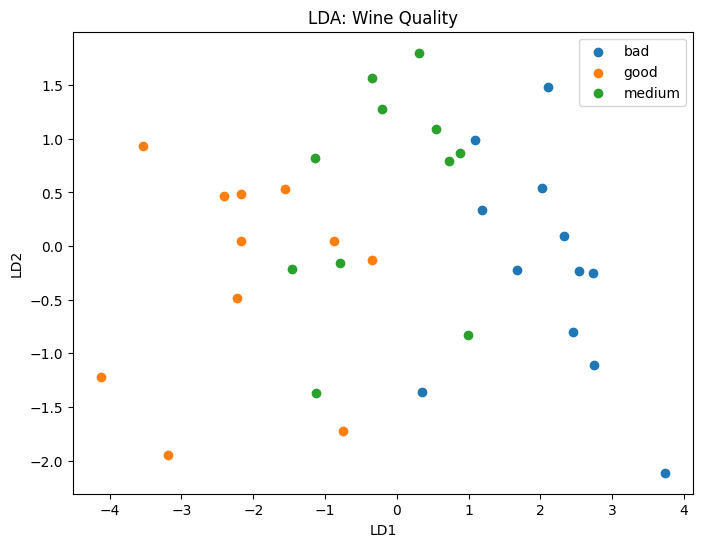

In [22]:
#c Maak de plot
X_lda = lda.transform(X)
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=label)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA: Wine Quality')
plt.legend(loc='best')
plt.show()

In [23]:
#d Pas het predict commando even toe op de oorspronkelijke gegevens. Hoeveel percent van de wijnen krijgen dezelfde label opgeplakt via de discriminantanalyse als geobserveerd?

# Voorspel de labels voor de oorspronkelijke gegevens
y_pred = lda.predict(X)

# Bereken het percentage van de wijnen die hetzelfde label krijgen
accuracy = np.mean(y_pred == y) * 100
print(f"Percentage van de wijnen met hetzelfde label: {accuracy:.2f}%")

Percentage van de wijnen met hetzelfde label: 79.41%


### vraag 2

In [45]:
#a Analyseer de type van gegevens in deze dataset

birthwt = pd.read_csv('./data/birthwt.csv', delimiter=';')
birthwt.describe()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.312169,23.238095,129.814815,1.846561,0.391534,0.195767,0.063492,0.148148,0.793651,2944.587302
std,0.464609,5.298678,30.579380,0.918342,0.489390,0.493342,0.244494,0.356190,1.059286,729.214295
min,0.000000,14.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,709.000000
25%,0.000000,19.000000,110.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2414.000000
50%,0.000000,23.000000,121.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2977.000000
75%,1.000000,26.000000,140.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3487.000000
max,1.000000,45.000000,250.000000,3.000000,1.000000,3.000000,1.000000,1.000000,6.000000,4990.000000


In [37]:
#b Welke kolommen kunnen er als afhankelijke variabele voor een discriminant analyse worden gebruikt?
# gelijk welke categorische/kwalitatieve variabele kan gebruikt worden als afhankelijke
# variabele: low, smoke, race, ...
# In de oplossing van deze oefening hebben we voor de variabele smoke gekozen
afhankelijke_variabele = birthwt['smoke']

#c Welke kolommen kunnen er als onafhankelijke variabelen voor een discriminant analyse worden gebruikt?
# in principe, mogen alleen continue, normal verdeelde lineair, niet-gecorreleerde variabelen gebruikt worden. Alleen de variabelen age, lwt, bwt lijken geschikt
onafhankelijke_variabelen = birthwt[['age', 'lwt', 'bwt']]

In [38]:
#d Pas een discriminatanalyse toe op deze data set (maakt gebruik van je keuzes hierboven).
lda = LinearDiscriminantAnalysis()
lda.fit(onafhankelijke_variabelen, afhankelijke_variabele)

LinearDiscriminantAnalysis()

In [40]:
#e Hoeveel dimensies heeft de discriminantanalyse?
# Bepaal het aantal unieke klassen in de afhankelijke variabele
k = birthwt['smoke'].nunique()

# Aantal onafhankelijke variabelen
p = 3

# Bereken het aantal dimensies
num_dimensions = min(k-1, p)
print(f"Aantal dimensies: {num_dimensions}")

Aantal dimensies: 1


In [48]:
#f Maak een plot van de resultaten van de discriminantanalyse
X_lda = lda.transform(onafhankelijke_variabelen)

# Create a scatter plot of the transformed variables
plt.figure(figsize=(8, 6))
for label in np.unique(afhankelijke_variabele):
    plt.scatter(X_lda[afhankelijke_variabele == label, 0], X_lda[afhankelijke_variabele == label, 1], label=label)

# Label the axes and the plot
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA: Birth Weight Data')
plt.legend(loc='best')
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 800x600 with 0 Axes>

### vraag 3

In [49]:
#a Analyseer de type van gegevens in deze dataset

cars93 = pd.read_csv('./data/cars93.csv', delimiter=';')
cars93.describe()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


In [ ]:
#b Splits de data set in twee: de eerste 90 rijen als ‘leer data set’ waarom je een discriminant analyse gaat toepassen (zie e) en de laatste 3 rijen om na te gaan of de bekomen discriminant analyse deze auto’s in de juiste klasse plaatst (zie g).
train_data = cars93.iloc[:90]
test_data = cars93.iloc[-3:]

In [50]:
#c Welke kolommen kunnen er als afhankelijke variabele voor een discriminant analyse worden gebruikt?
afhankelijke_variabele = cars93['Manufacturer']
#d Welke kolommen kunnen er als onafhankelijke variabelen voor een discriminant analyse worden gebruikt?
onafhankelijke_variabelen = cars93[['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length',
'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']]

In [51]:
#e Pas een discriminatanalyse toe op deze data set. Neem als afhankelijke variabele de kolom Type en als onafhankelijke variabelen alle bruikbare kolomen
lda = LinearDiscriminantAnalysis()
lda.fit(onafhankelijke_variabelen, afhankelijke_variabele)

ValueError: Input X contains NaN.
LinearDiscriminantAnalysis does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [52]:
print(cars93.isna().sum())

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags               34
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64
